In [1]:
%load_ext autoreload
%autoreload 2
from analysis_settings import *
from plot_settings import *
import numpy as np
from scripts.utils_plot import _save_fig

In [2]:
ch_choice = 'ch_dist_sweet'
dataframes = get_dfs(ch_choice)
df_n = dataframes['df_sample_sizes']
df_abs = dataframes['df_abs']
df_per = dataframes['df_per']

/Users/moritzgerster/Library/CloudStorage/Dropbox/Code/STN_broadband_power/notebooks/analysis_settings.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['sub_hemi_cond'] = df.sub_hemi + '_' + df.cond
/Users/moritzgerster/Library/CloudStorage/Dropbox/Code/STN_broadband_power/notebooks/analysis_settings.py:81: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pivot['UPDRS_exists'] = pivot.UPDRS_bradyrigid_contra.notna()
/Users/moritzgerster/Library/CloudStorage/Dropbox/Code/STN_broadband_power/notebooks/analysis_settings.py:82: 

In [3]:
all_patients = df_n.subject.nunique()
print(f'All patients: {all_patients}')

All patients: 130


In [4]:
mask = df_n.UPDRS_exists
updrs_exists = df_n[df_n.UPDRS_exists].subject.nunique()
print(f'UPDRS available: {updrs_exists}')

UPDRS available: 125


## Off condition

In [5]:
df_n.groupby('project_nme').subject.nunique()

project_nme
Berlin         50
Düsseldorf1    27
Düsseldorf2    22
London         14
Oxford         17
Name: subject, dtype: int64

In [6]:
mask_off = mask & df_n.asymmetric_off
patient_asym_consistent = df_n[mask_off].subject.nunique()
print(f'Asymmetric symptoms off: {patient_asym_consistent}')

Asymmetric symptoms off: 98


In [7]:
mask_off &= df_n.both_hemis_off_available & df_n.has_model
patient_hemis_both = df_n[mask_off].subject.nunique()
print(f'Good data in both hemispheres off: {patient_hemis_both}')

Good data in both hemispheres off: 78


## On condition

In [8]:
mask_on = mask & df_n.asymmetric_on
patient_asym_consistent = df_n[mask_on].subject.nunique()
print(f'Asymmetric symptoms on: {patient_asym_consistent}')

Asymmetric symptoms on: 92


In [9]:
mask_on &= df_n.both_hemis_on_available & df_n.has_model
patient_hemis_both = df_n[mask_on].subject.nunique()
print(f'Good data in both hemispheres on: {patient_hemis_both}')

Good data in both hemispheres on: 63


In [10]:
mask_on &= df_n.dominant_side_consistent
patient_asym_consistent = df_n[mask_on].subject.nunique()
print(f'Asymmetry consistent both off and on condition: {patient_asym_consistent}')

Asymmetry consistent both off and on condition: 45


## Study distribtution

In [11]:
# # Create a new DataFrame for 'original' data
# df_n['status'] = 'Original'

# # Create a copy for 'off' and 'on' subsets and label them
# df_off = df_n[mask_off].copy()
# df_off['status'] = 'Off'

# df_on = df_n[mask_on].copy()
# df_on['status'] = 'On'

# # Concatenate the dataframes to have a combined DataFrame with 'status' column
# df_combined = pd.concat([df_n, df_off, df_on], ignore_index=True)


In [12]:
# for multiple in ['layer', 'dodge', 'stack', 'fill']:
#     fig, ax = plt.subplots(1, 1, figsize=(8, 4))

#     sns.histplot(data=df_combined, x='project_nme', discrete=True, stat="count",
#                 hue='status', multiple=multiple, ax=ax,
#                 #  palette=cfg.COLOR_DIC
#                 )

#     ax.set_xlabel(None)
#     ax.set_ylabel(r'$n_{\text{sub}}$')
#     ax.legend(title='Status')

#     plt.tight_layout()
#     save_dir = join(SAVE_DIR, 'Figure5', 'ch_dist_sweet')
#     _save_fig(fig, 'patients_sample_size_asymmetric', save_dir, close=False, bbox_inches=None)
#     plt.show()


/var/folders/1y/49sjn_6j1_sgl474yd2zw6pc0000gn/T/ipykernel_91692/690316868.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cfg.PROJECT_NAMES, rotation=40, ha='right')


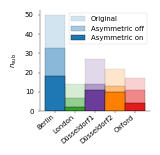

In [13]:
# sort projects in df_n according to cfg.PROJECT_NAMES
df_n['project_nme'] = pd.Categorical(df_n['project_nme'], categories=cfg.PROJECT_NAMES, ordered=True)

fig, ax = plt.subplots(1, 1, figsize=(1.55, 1.5), sharey=True)

# Full data
sns.histplot(data=df_n, x='project_nme', discrete=True, stat="count", ax=ax,
             label='Original')

# Iterate through each bar and set the color based on the project name
for i, patch in enumerate(ax.patches):
    project = cfg.PROJECT_NAMES[i]
    patch.set_facecolor(cfg.COLOR_DIC[project])
    patch.set_alpha(0.2)

# Filtered data Off
sns.histplot(data=df_n[mask_off], x='project_nme', discrete=True, stat="count",
             ax=ax, label=f'Asymmetric {cfg.COND_DICT["off"]}')
for i, patch in enumerate(ax.patches[5:]):
    project = cfg.PROJECT_NAMES[i]
    patch.set_facecolor(cfg.COLOR_DIC[project])
    patch.set_alpha(0.4)


# Filtered data On
sns.histplot(data=df_n[mask_on], x='project_nme', discrete=True, stat="count",
             ax=ax, label=f'Asymmetric {cfg.COND_DICT["on"]}')
for i, patch in enumerate(ax.patches[10:]):
    project = cfg.PROJECT_NAMES[i]
    patch.set_facecolor(cfg.COLOR_DIC[project])

ax.legend()
ax.set_xlabel(None)
ax.set_xticklabels(cfg.PROJECT_NAMES, rotation=40, ha='right')
ax.tick_params(axis='x', pad=0.5)
ax.set_ylabel(r'$n_{\text{sub}}$')

plt.tight_layout()
save_dir = join(SAVE_DIR, 'Figure5', 'ch_dist_sweet')
_save_fig(fig, 'patients_sample_size_asymmetric', save_dir, close=False, bbox_inches=None)
plt.show()


In [14]:
df = dataframes['df_abs']
df = df[(df.project != 'all') & (df.cond == 'offon_abs')]
mean = df.groupby('project').subject.nunique().mean()
std = df.groupby('project').subject.nunique().std()
print(f'Number of subjects per project: {mean:.2f} ± {std:.2f}')

Number of subjects per project: 21.40 ± 9.53


In [15]:
mean = np.nanmean(df.groupby('subject').patient_days_after_implantation.unique())[0]
std = np.nanstd(df.groupby('subject').patient_days_after_implantation.unique())[0]
# mean
print(f'Number of days after implantation: {mean:.2f} ± {std:.2f}')

Number of days after implantation: 2.64 ± 1.76


## Directional DBS channels

In [16]:
df_pat = df_abs.drop_duplicates(subset=['subject'])
df_pat.groupby('project').DBS_directional.value_counts()

project     DBS_directional
Florin      True               27
Hirschmann  False              22
Litvak      False              14
Neumann     True               49
            False               1
Tan         True               12
            False               5
Name: count, dtype: int64

In [17]:
df_pat = df_abs[(df_abs.project == 'Neumann')].drop_duplicates(subset=['subject'])
df_pat[df_pat.patient_disease_duration == 40]

,subject,ch_nme,cond,title,alpha_abs_max,alpha_abs_max5Hz,alpha_abs_max5Hz_log,alpha_abs_max_3Hz,alpha_abs_max_3Hz_log,alpha_abs_max_7Hz,...,UPDRS_pre_tremor_total,UPDRS_rigidity_contra,UPDRS_rigidity_ipsi,UPDRS_tremor_contra,UPDRS_tremor_ipsi,project_nme,color,subject_nme,sub_hemi,sub_hemi_cond


In [18]:
df_abs[(df_abs.project == 'Neumann') & df_abs.cond.isin(['off', 'on'])].drop_duplicates(subset=['subject', 'cond']).groupby('cond').patient_days_after_implantation.value_counts()

cond  patient_days_after_implantation
off   3.0                                12
      4.0                                 8
      6.0                                 6
      5.0                                 5
      7.0                                 2
on    3.0                                13
      2.0                                 5
      6.0                                 5
      5.0                                 4
      4.0                                 2
      7.0                                 1
Name: count, dtype: int64

In [19]:
df_abs[(df_abs.project == 'Neumann') & df_abs.cond.isin(['off', 'on'])].drop_duplicates(subset=['subject', 'cond']).groupby('cond').patient_days_after_implantation.mean()

cond
off    4.333333
on     3.800000
Name: patient_days_after_implantation, dtype: float64

In [20]:
df_abs[(df_abs.project == 'Neumann') & df_abs.cond.isin(['off', 'on'])].drop_duplicates(subset=['subject', 'cond']).groupby('cond').patient_days_after_implantation.std()

cond
off    1.314978
on     1.494819
Name: patient_days_after_implantation, dtype: float64

Differences between recording days (off - on):
difference
 1.0    9
 0.0    5
-1.0    3
 2.0    2
 3.0    2
-3.0    1
 4.0    1
Name: count, dtype: int64
3.2857142857142856
2.870208222079931


<Axes: >

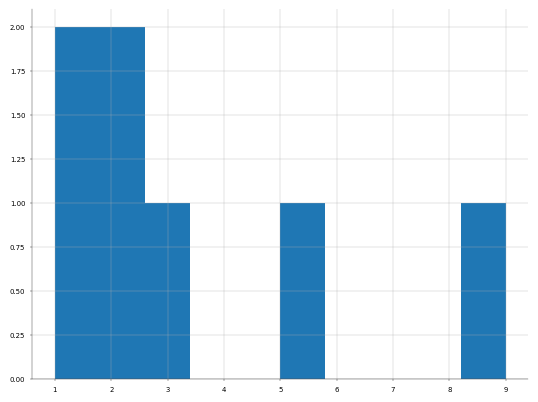

In [21]:
df_filtered = df_abs[(df_abs.project == 'Neumann') & df_abs.cond.isin(['off', 'on'])].drop_duplicates(subset=['subject', 'cond'])
pivoted = df_filtered.pivot(index='subject', columns='cond', values='patient_days_after_implantation')
pivoted['difference'] = pivoted['off'] - pivoted['on']
# Count the occurrences of each difference
difference_counts = pivoted['difference'].value_counts()

# Print the result
print("Differences between recording days (off - on):")
print(difference_counts)
print(difference_counts.mean())
print(difference_counts.std())
difference_counts.hist()


## Oxford DBS centers

In [22]:
[col for col in df_abs.columns if 'patient' in col]

['patient_age',
 'patient_days_after_implantation',
 'patient_disease_duration',
 'patient_handedness',
 'patient_LEDD',
 'patient_medication_preop',
 'patient_participant_id',
 'patient_PD_subtype',
 'patient_recording_site',
 'patient_sex',
 'patient_symptom_dominant_side',
 'patient_symptom_dominant_side_BR',
 'patient_symptom_dominant_side_BR_off',
 'patient_symptom_dominant_side_BR_on']

In [23]:
df_abs[df_abs.project == 'Tan'].drop_duplicates(subset='subject').patient_recording_site.value_counts()

patient_recording_site
SG    13
K      4
Name: count, dtype: int64

# Percentage of Oxford subjects for Levodopa modulation - 1/f analysis

In [24]:
from scripts.utils_plot import equalize_x_and_y
df_per = df_per[df_per.cond.isin(['off', 'on']) & (df_per.project != 'all')]
df_per, n_sample = equalize_x_and_y(df_per, 'cond', 'psd')

In [25]:
n_oxf = df_per[(df_per.project == 'Tan')].sub_hemi.nunique()
n_all = df_per.sub_hemi.nunique()

print(f'Percentage of Oxford STNs in aperiodic Levodopa modulation analysis: {n_oxf/n_all*100:.2f}%')

Percentage of Oxford STNs in aperiodic Levodopa modulation analysis: 11.73%
